In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from matplotlib import font_manager, rc
font_info="c:/windows/fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_info).get_name()
rc('font',family=font_name)

In [4]:
data=pd.read_csv('Downloads/python_test/accidentdata.csv')
data.head(5)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012050901,10,야간,수,1,1,0,0,0,...,단일로,기타단일로,승용차,대형,화물차,대형,1032000,1731688,127.853191,35.580719
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052937,37.317615
2,2012,2012102620,55,야간,금,1,2,1,0,0,...,단일로,기타단일로,승용차,중형,승용차,소형,1045245,1799427,128.003224,36.190921
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
4,2012,2012061804,15,야간,월,1,1,0,0,0,...,기타/불명,기타/불명,화물차,대형,화물차,대형,1013547,1663287,127.648393,34.964371


In [53]:
##사상자수 3명 이상인 사람에 대해, 요일별로 그룹화하여 사상자수 표시

In [5]:
d2=data[(data.사상자수>=3)]
d2

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
5,2012,2012071508,4,주간,일,1,5,0,4,0,...,단일로,교량위,승합차,중형,0,0,1021668,1665087,127.727500,34.987279
8,2012,2012100102,43,야간,월,1,5,1,3,0,...,단일로,기타단일로,승용차,중형,승용차,중형,1115618,1717852,128.773999,35.449758
10,2012,2012083008,15,주간,목,1,5,1,3,0,...,단일로,기타단일로,화물차,대형,화물차,소형,1093633,1766952,128.537498,35.894706
18,2012,2012092002,10,야간,목,1,3,0,2,0,...,단일로,기타단일로,화물차,중형,화물차,중형,1067262,1809084,128.248916,36.276697
19,2012,2012010101,5,야간,일,1,6,5,0,0,...,단일로,기타단일로,승용차,중형,승용차,소형,946530,1737729,126.909406,35.634077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,2014,2014052306,55,주간,금,1,10,1,3,5,...,단일로,기타단일로,승용차,중형,승합차,대형,936796,1925825,126.786568,37.329279
14605,2014,2014061618,27,야간,월,1,4,1,2,0,...,교차로,교차로내,승용차,소형,승용차,중형,986642,2025339,127.347380,38.228274
14620,2014,2014071218,20,야간,토,1,8,2,5,0,...,단일로,기타단일로,화물차,소형,승용차,소형,957496,1775019,127.028576,35.970994
14621,2014,2014071504,30,야간,화,2,6,2,2,0,...,단일로,기타단일로,승용차,중형,승용차,소형,1112317,1757467,128.743150,35.807242


In [34]:
d3=d2.groupby('요일')

<IPython.core.display.Javascript object>


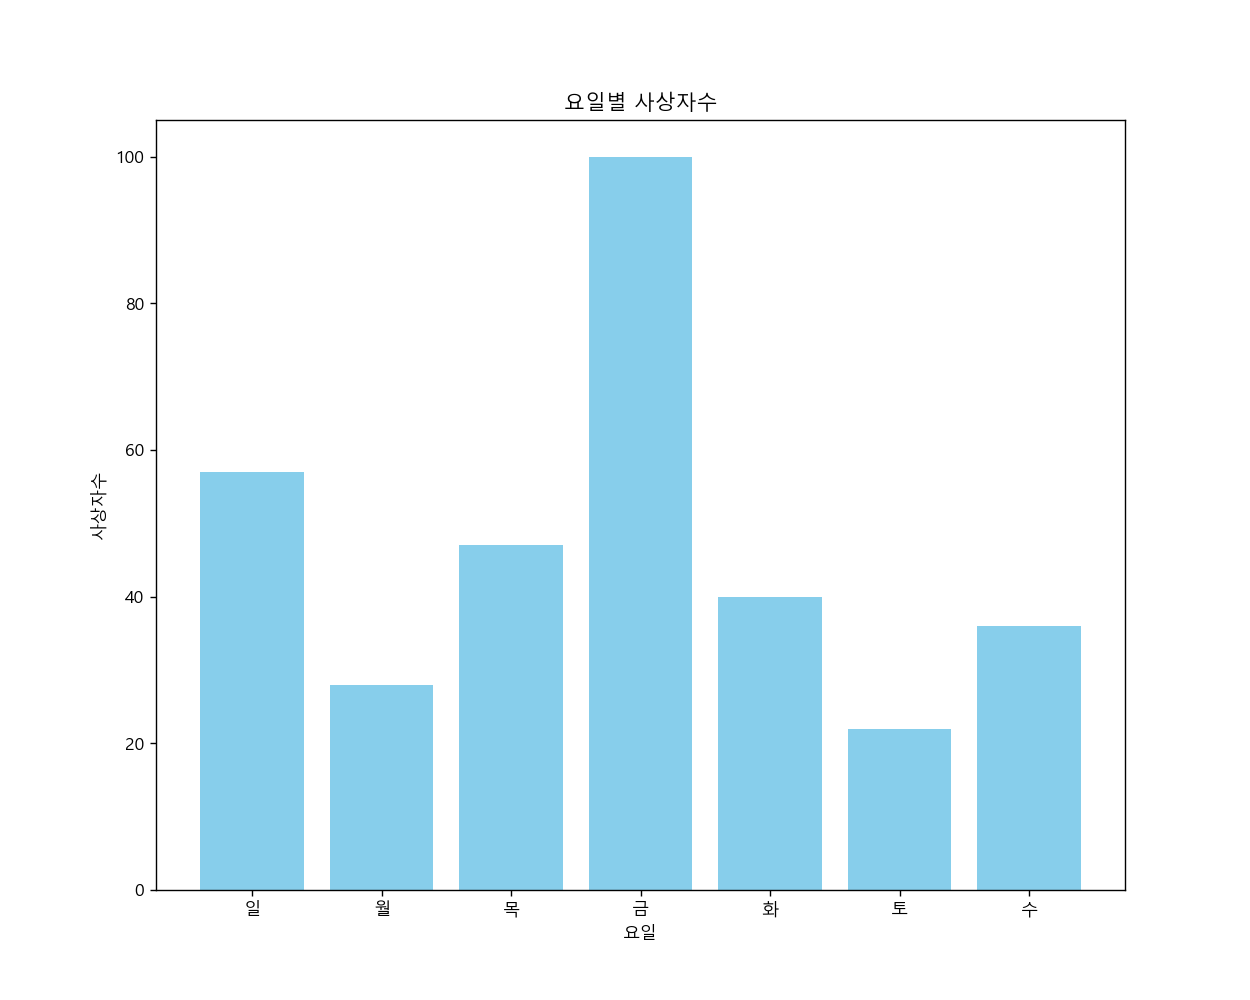

In [40]:
d3=d2[['사상자수','요일']]

d3.groupby('요일').sum()

plt.figure(figsize=(10,8))
plt.bar(d3['요일'], d3['사상자수'], color='skyblue')

plt.title('요일별 사상자수')
plt.xlabel('요일')
plt.ylabel('사상자수')

plt.show()

In [17]:
#발생지시도가 경기도인 곳 중, 발생지시군구로 그룹화해서, 사상자수의 합계를 원형차트로 표기

In [8]:
d1=data[data.발생지시도=='경기']
d1

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052937,37.317615
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
6,2012,2012053104,17,야간,목,1,2,1,0,0,...,단일로,기타단일로,승용차,소형,건설기계,건설기계,971512,1953274,127.177364,37.578407
13,2012,2012101602,45,야간,화,1,1,0,0,0,...,단일로,기타단일로,승용차,소형,특수차,대형,946961,1921288,126.901626,37.289021
14,2012,2012121404,50,야간,금,1,2,0,1,0,...,단일로,기타단일로,화물차,소형,화물차,대형,942679,1937985,126.852028,37.439262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,2014,2014052306,55,주간,금,1,10,1,3,5,...,단일로,기타단일로,승용차,중형,승합차,대형,936796,1925825,126.786568,37.329279
14594,2014,2014060510,50,주간,목,1,1,0,0,0,...,단일로,기타단일로,건설기계,건설기계,보행자,보행자,937764,1942780,126.796066,37.482162
14600,2014,2014061715,12,주간,화,1,1,0,0,0,...,단일로,기타단일로,승용차,소형,보행자,보행자,1000212,1943771,127.502398,37.493192
14603,2014,2014061920,48,야간,목,1,1,0,0,0,...,단일로,횡단보도상,화물차,소형,보행자,보행자,947126,1880495,126.906364,36.921331


<IPython.core.display.Javascript object>


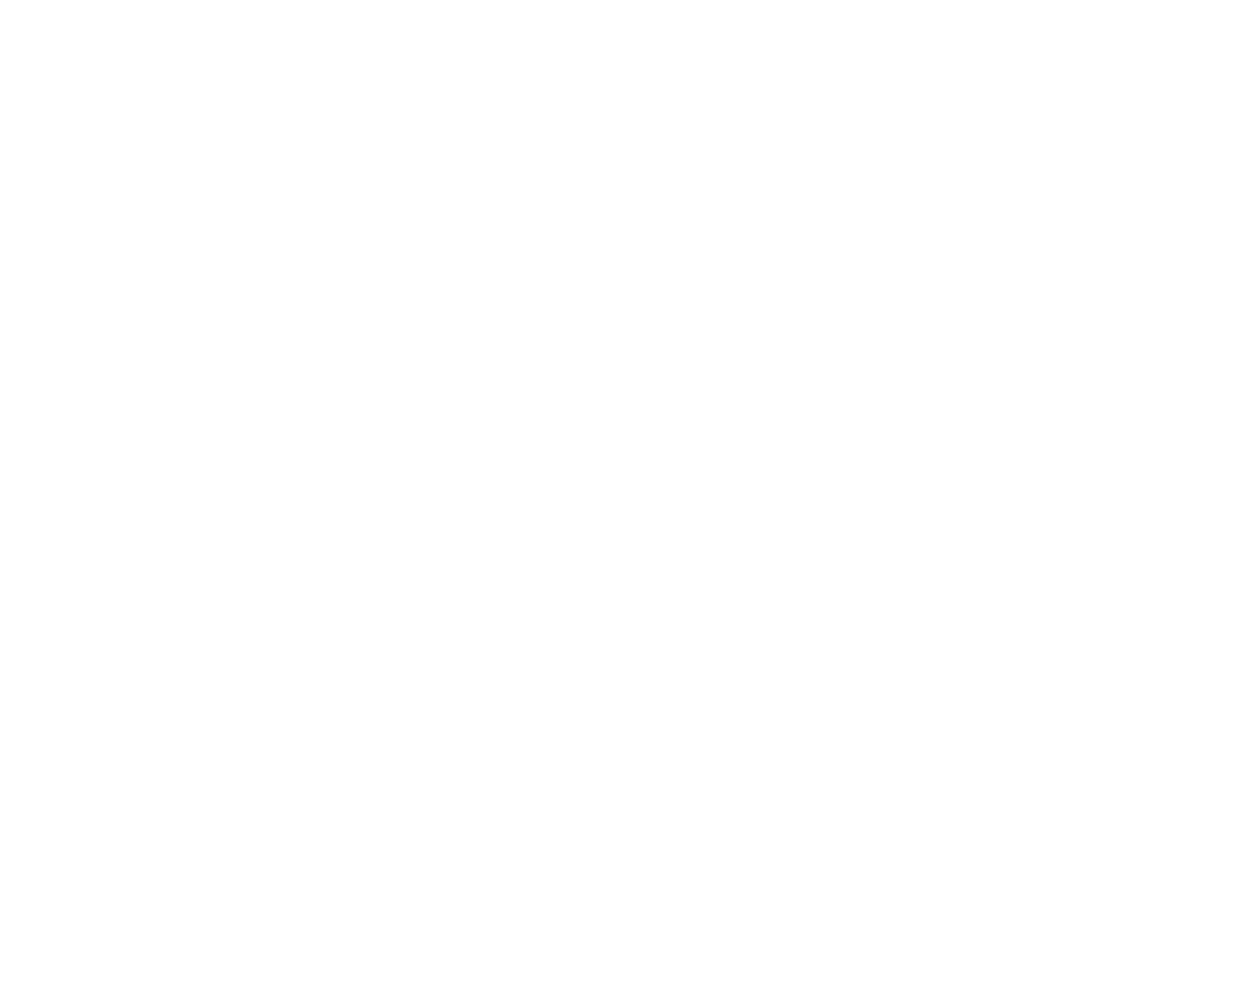

<IPython.core.display.Javascript object>


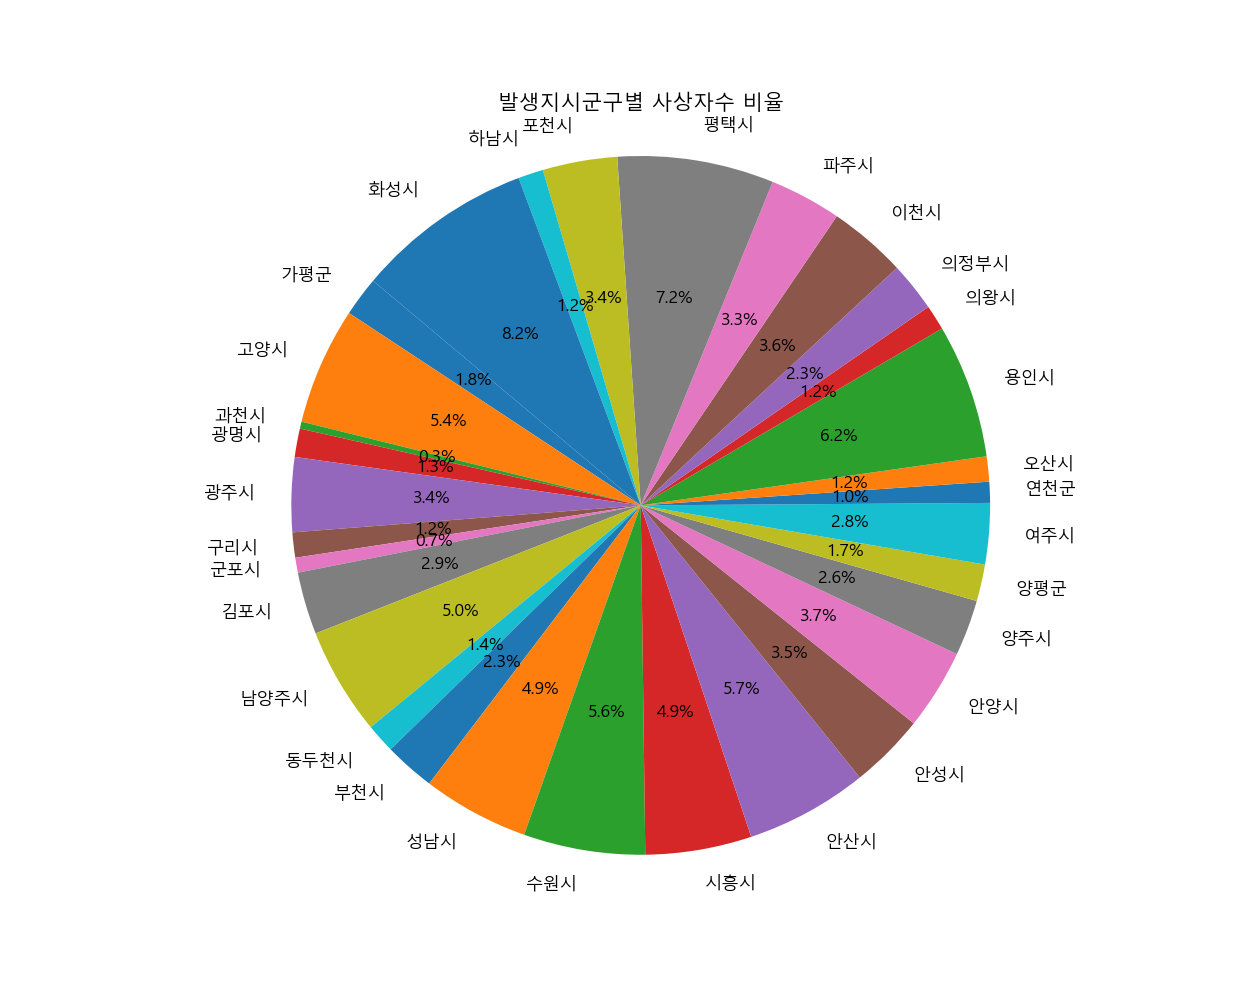

In [41]:
plt.figure(figsize=(10,8))
df = d1[['발생지시군구', '사상자수']]

grouped = df.groupby('발생지시군구').sum()

# 원형 그래프 그리기
plt.figure(figsize=(10, 8))
plt.pie(grouped['사상자수'], labels=grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('발생지시군구별 사상자수 비율')
plt.axis('equal')  # 원형 그래프를 원형으로 유지
plt.show()

In [31]:
##요일, 발생지시도 별 사고발생건수

In [42]:
df_pv=pd.crosstab(data['요일'],data['발생지시도'])
df_pv

발생지시도,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
요일,,,,,,,,,,,,,,,,,
금,101,379,205,239,48,76,50,75,174,6,41,70,181,162,41,169,104
목,108,404,177,216,41,78,42,89,174,10,43,79,170,134,42,173,115
수,106,390,185,210,41,71,41,81,171,8,41,68,192,122,49,162,104
월,102,400,211,225,40,69,47,85,174,5,60,66,195,165,28,189,120
일,93,377,150,193,36,90,31,88,137,4,41,47,128,129,40,156,106
토,85,417,189,198,59,87,54,95,172,7,55,76,210,137,38,181,116
화,108,410,185,230,46,74,45,83,171,13,49,80,198,158,37,158,118


In [43]:
result=df_pv.div(df_pv.sum(1).astype(float),axis=0)
result

발생지시도,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
요일,,,,,,,,,,,,,,,,,
금,0.047619,0.178689,0.096653,0.112683,0.022631,0.035832,0.023574,0.035361,0.082037,0.002829,0.019331,0.033003,0.085337,0.076379,0.019331,0.079679,0.049033
목,0.051551,0.192840,0.084487,0.103103,0.019570,0.037232,0.020048,0.042482,0.083055,0.004773,0.020525,0.037709,0.081146,0.063962,0.020048,0.082578,0.054893
수,0.051910,0.190989,0.090597,0.102840,0.020078,0.034770,0.020078,0.039667,0.083741,0.003918,0.020078,0.033301,0.094025,0.059745,0.023996,0.079334,0.050930
월,0.046768,0.183402,0.096745,0.103164,0.018340,0.031637,0.021550,0.038973,0.079780,0.002293,0.027510,0.030261,0.089409,0.075653,0.012838,0.086657,0.055021
일,0.050379,0.204225,0.081257,0.104550,0.019502,0.048754,0.016793,0.047671,0.074215,0.002167,0.022210,0.025460,0.069339,0.069881,0.021668,0.084507,0.057421
토,0.039062,0.191636,0.086857,0.090993,0.027114,0.039982,0.024816,0.043658,0.079044,0.003217,0.025276,0.034926,0.096507,0.062960,0.017463,0.083180,0.053309
화,0.049931,0.189552,0.085529,0.106334,0.021267,0.034212,0.020804,0.038373,0.079057,0.006010,0.022654,0.036986,0.091540,0.073047,0.017106,0.073047,0.054554


<IPython.core.display.Javascript object>


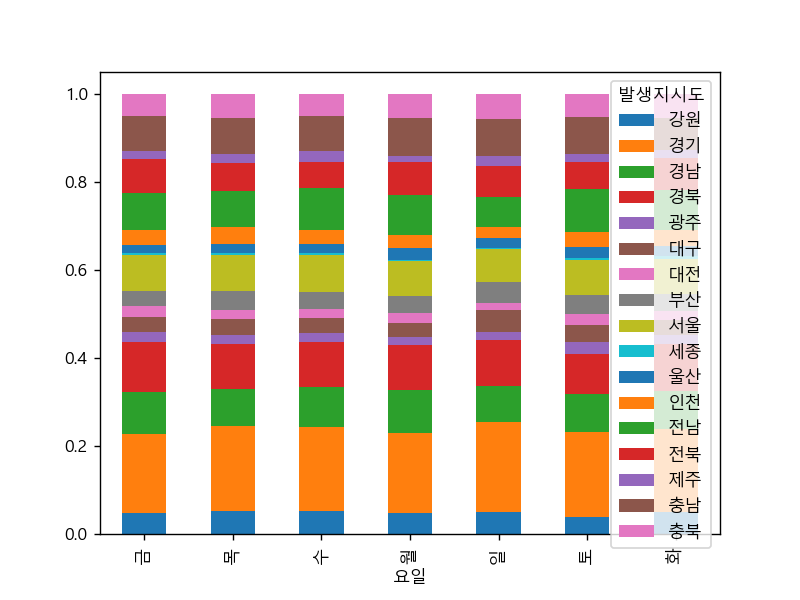

<AxesSubplot:xlabel='요일'>

In [44]:
%matplotlib notebook
result.plot(kind='bar',stacked=True)

In [36]:
##사고유형별 사망자수

In [45]:
d4=data[(data.사망자수>=1)]
d4

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012050901,10,야간,수,1,1,0,0,0,...,단일로,기타단일로,승용차,대형,화물차,대형,1032000,1731688,127.853191,35.580719
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052937,37.317615
2,2012,2012102620,55,야간,금,1,2,1,0,0,...,단일로,기타단일로,승용차,중형,승용차,소형,1045245,1799427,128.003224,36.190921
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
4,2012,2012061804,15,야간,월,1,1,0,0,0,...,기타/불명,기타/불명,화물차,대형,화물차,대형,1013547,1663287,127.648393,34.964371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14619,2014,2014070516,30,주간,토,1,1,0,0,0,...,단일로,기타단일로,승용차,중형,보행자,보행자,1111720,1805062,128.743266,36.236321
14620,2014,2014071218,20,야간,토,1,8,2,5,0,...,단일로,기타단일로,화물차,소형,승용차,소형,957496,1775019,127.028576,35.970994
14621,2014,2014071504,30,야간,화,2,6,2,2,0,...,단일로,기타단일로,승용차,중형,승용차,소형,1112317,1757467,128.743150,35.807242
14622,2014,2014071020,40,야간,목,1,3,0,2,0,...,단일로,기타단일로,화물차,소형,농기계,농기계,1047968,1725622,128.029069,35.525381


In [47]:
d5=d4[['사고유형_중분류','사망자수']]
d5

,사고유형_중분류,사망자수
0,추돌,1
1,추돌,1
2,측면직각충돌,1
3,추돌,1
4,추돌,1
...,...,...
14619,기타,1
14620,측면직각충돌,1
14621,기타,2
14622,추돌,1


<IPython.core.display.Javascript object>


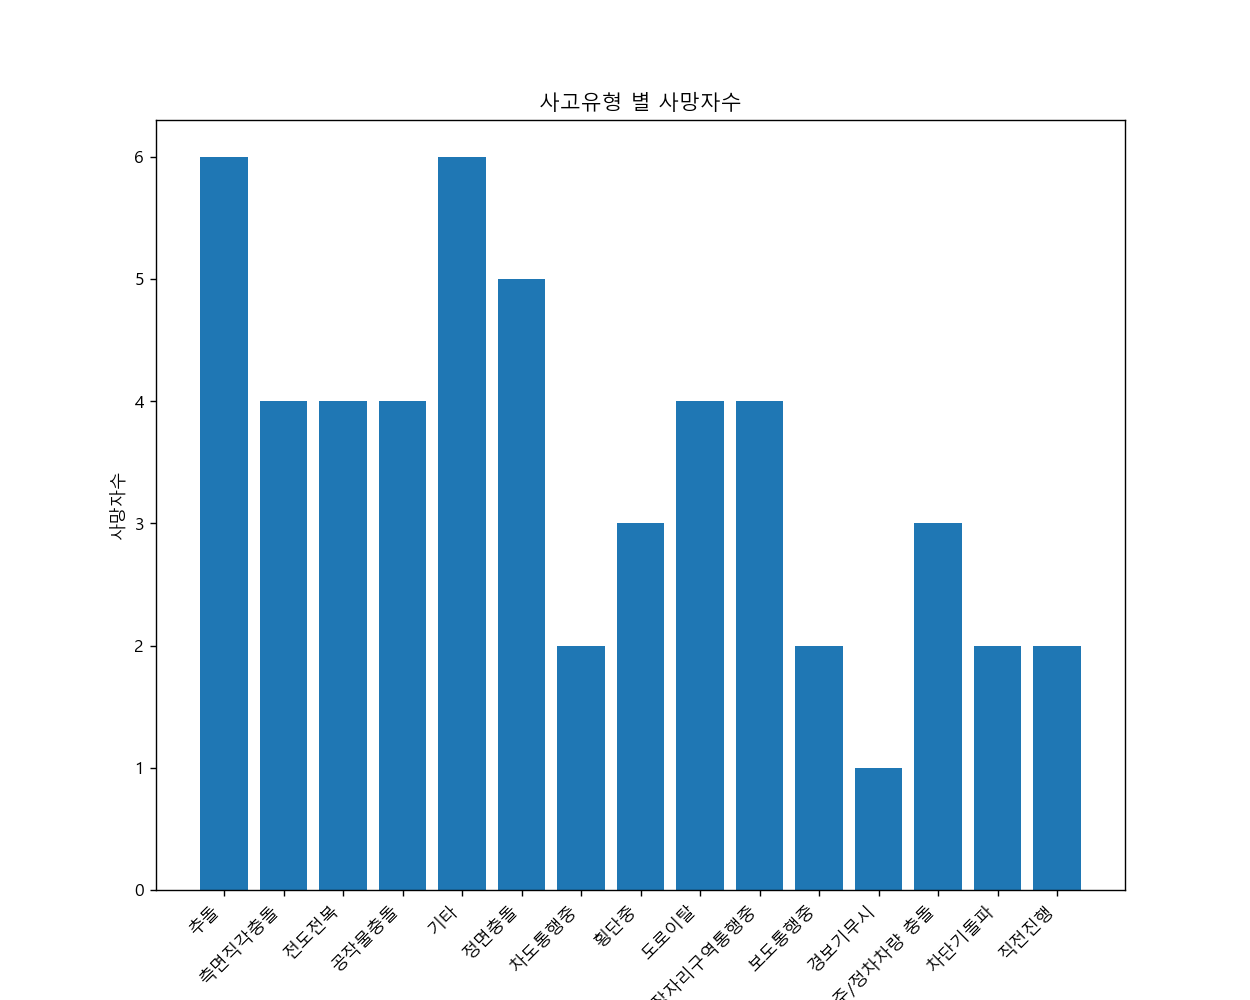

In [50]:
plt.figure(figsize=(10,8))

d5.groupby('사망자수').sum()
plt.bar(d5['사고유형_중분류'],d5['사망자수'])

plt.title('사고유형 별 사망자수')
plt.xlabel('사고유형')
plt.ylabel('사망자수')
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()